In [1]:
import sys
sys.path.append('..')

from src.utils.model import *
from src.utils.dataset import *

In [7]:
seed = 0
np.random.seed(seed)
torch.manual_seed(seed)

torch.set_default_tensor_type(torch.DoubleTensor)

device = 'cpu'

p = 4 # S4
embd_dim = 10
input_token = 2*p
num_perms = 1 if p == 0 else np.prod([i for i in range(1,p+1)])

# perm_max = list([str(i) for i in range(1,p+1)])
# perm_max.reverse()
vocab_size = p+1

#model_mode = 'standard'
#model_mode = 'ip'
model_mode = 'hs1'

if model_mode == 'ip':
    # ip model
    unembd = True
    weight_tied = True
    hidden_size = 100
    shp = [input_token * embd_dim, hidden_size, embd_dim, vocab_size]
    model = MLP(shp=shp, vocab_size=vocab_size, embd_dim=embd_dim, input_token=input_token, unembd=unembd, weight_tied=weight_tied, seed=seed).to(device)
elif model_mode == 'hs3':
    weight_tied = True
    hidden_size = 100
    shp = [input_token * embd_dim, hidden_size, embd_dim, vocab_size]
    model = MLP_HS(shp=shp, vocab_size=vocab_size, embd_dim=embd_dim, input_token=input_token, weight_tied=weight_tied, seed=seed, n=1).to(device)
elif model_mode == 'hs2':
    weight_tied = True
    hidden_size = 100
    shp = [input_token * embd_dim, hidden_size, embd_dim, vocab_size]
    model = MLP_HS(shp=shp, vocab_size=vocab_size, embd_dim=embd_dim, input_token=input_token, weight_tied=weight_tied, seed=seed, n=math.sqrt(embd_dim)).to(device)
elif model_mode == 'hs1':
    weight_tied = True
    hidden_size = 100
    shp = [input_token * embd_dim, hidden_size, embd_dim, vocab_size]
    model = MLP_HS(shp=shp, vocab_size=vocab_size, embd_dim=embd_dim, input_token=input_token, weight_tied=weight_tied, seed=seed, n=embd_dim).to(device)
elif model_mode == 'standard':
    unembd = False
    weight_tied = False
    hidden_size = 100
    shp = [input_token * embd_dim, hidden_size, hidden_size, vocab_size]
    #shp = [input_token * embd_dim, hidden_size, vocab_size]
    model = MLP(shp=shp, vocab_size=vocab_size, embd_dim=embd_dim, input_token=input_token, unembd=unembd, weight_tied=weight_tied, seed=seed).to(device)
else:
    print('model_mode not recognized!')
    

In [3]:
perms = list(itertools.permutations(range(p)))
# perms_list = np.array([sum(math.pow(10, i) * num for i, num in enumerate(reversed(tup))) for tup in perms]).astype(int)
num_perms = len(perms)

idx = torch.arange(num_perms)

data_id = np.array([perms[int(i)],perms[int(j)]] for i, j in torch.cartesian_prod(idx, idx)) # to maintain tuples

In [13]:
for i, j in torch.cartesian_prod(idx, idx):
    print(i,j)

tensor(0) tensor(0)
tensor(0) tensor(1)
tensor(0) tensor(2)
tensor(0) tensor(3)
tensor(0) tensor(4)
tensor(0) tensor(5)
tensor(0) tensor(6)
tensor(0) tensor(7)
tensor(0) tensor(8)
tensor(0) tensor(9)
tensor(0) tensor(10)
tensor(0) tensor(11)
tensor(0) tensor(12)
tensor(0) tensor(13)
tensor(0) tensor(14)
tensor(0) tensor(15)
tensor(0) tensor(16)
tensor(0) tensor(17)
tensor(0) tensor(18)
tensor(0) tensor(19)
tensor(0) tensor(20)
tensor(0) tensor(21)
tensor(0) tensor(22)
tensor(0) tensor(23)
tensor(1) tensor(0)
tensor(1) tensor(1)
tensor(1) tensor(2)
tensor(1) tensor(3)
tensor(1) tensor(4)
tensor(1) tensor(5)
tensor(1) tensor(6)
tensor(1) tensor(7)
tensor(1) tensor(8)
tensor(1) tensor(9)
tensor(1) tensor(10)
tensor(1) tensor(11)
tensor(1) tensor(12)
tensor(1) tensor(13)
tensor(1) tensor(14)
tensor(1) tensor(15)
tensor(1) tensor(16)
tensor(1) tensor(17)
tensor(1) tensor(18)
tensor(1) tensor(19)
tensor(1) tensor(20)
tensor(1) tensor(21)
tensor(1) tensor(22)
tensor(1) tensor(23)
tensor(2) te

In [16]:
np.array([[perms[int(i)],perms[int(j)]] for i, j in torch.cartesian_prod(idx, idx)])

array([[[0, 1, 2, 3],
        [0, 1, 2, 3]],

       [[0, 1, 2, 3],
        [0, 1, 3, 2]],

       [[0, 1, 2, 3],
        [0, 2, 1, 3]],

       ...,

       [[3, 2, 1, 0],
        [3, 1, 2, 0]],

       [[3, 2, 1, 0],
        [3, 2, 0, 1]],

       [[3, 2, 1, 0],
        [3, 2, 1, 0]]])

In [10]:
data_id

array(<generator object <genexpr> at 0x00000212623A15D0>, dtype=object)

In [ ]:
dat

In [3]:
dataset = permutation_group_dataset(p=p, num=num_perms**2)
dataset

{'data_id': array([[0, 1, 2, ..., 1, 2, 3],
        [0, 1, 2, ..., 1, 3, 2],
        [0, 1, 2, ..., 2, 1, 3],
        ...,
        [3, 2, 1, ..., 1, 2, 0],
        [3, 2, 1, ..., 2, 0, 1],
        [3, 2, 1, ..., 2, 1, 0]]),
 'label': tensor([0, 2, 2, 3, 3, 2, 2, 4, 3, 4, 4, 3, 3, 4, 2, 3, 4, 4, 4, 3, 3, 2, 4, 4,
         2, 0, 3, 2, 2, 3, 4, 2, 4, 3, 3, 4, 4, 3, 3, 2, 4, 4, 3, 4, 2, 3, 4, 4,
         2, 3, 0, 2, 2, 3, 3, 4, 2, 3, 4, 4, 2, 4, 3, 4, 4, 3, 3, 4, 4, 4, 3, 2,
         3, 2, 2, 3, 0, 2, 4, 3, 4, 4, 2, 3, 3, 4, 4, 4, 3, 2, 2, 4, 3, 4, 4, 3,
         3, 2, 2, 0, 3, 2, 4, 3, 3, 2, 4, 4, 4, 2, 4, 3, 3, 4, 4, 3, 4, 4, 2, 3,
         2, 3, 3, 2, 2, 0, 3, 4, 4, 4, 3, 2, 4, 3, 4, 4, 2, 3, 4, 2, 4, 3, 3, 4,
         2, 4, 3, 4, 4, 3, 0, 2, 2, 3, 3, 2, 2, 3, 3, 4, 4, 4, 3, 2, 4, 3, 4, 4,
         4, 2, 4, 3, 3, 4, 2, 0, 3, 2, 2, 3, 3, 2, 4, 3, 4, 4, 2, 3, 3, 4, 4, 4,
         3, 4, 2, 4, 3, 4, 2, 3, 3, 4, 4, 4, 0, 2, 2, 3, 3, 2, 2, 3, 4, 4, 4, 3,
         4, 3, 3, 4, 2, 4, 3, 2, 4, 4,

In [11]:
dataset

{'train_data_id': array([[3421, 2134],
        [1423, 1234],
        [4213, 1234],
        [3142, 2134],
        [4312, 3124],
        [4312, 2134],
        [4321, 3214],
        [2341, 4213],
        [4213, 3421],
        [2341, 3241],
        [4132, 4231],
        [4312, 2413],
        [2314, 4132],
        [4231, 4312],
        [2143, 2143],
        [2134, 3241],
        [4231, 3241],
        [3412, 1324],
        [2341, 2341],
        [4123, 1342],
        [4213, 4123],
        [3421, 2143],
        [4312, 3421],
        [3142, 3142],
        [2314, 2314],
        [2413, 4321],
        [1243, 3142],
        [3214, 1243],
        [4132, 4312],
        [1342, 4123],
        [2413, 2413],
        [3241, 1432],
        [1243, 2143],
        [3214, 2134],
        [1234, 3214],
        [2134, 4231],
        [3124, 4213],
        [1234, 1243],
        [3412, 1234],
        [3241, 1423],
        [2341, 2314],
        [4123, 2143],
        [3412, 2431],
        [3214, 2413],
        [2143, 

In [8]:
dataset = permutation_group_dataset(p=p, num=num_perms**2)
#dataset = repeat_dataset(dataset)

In [9]:
dataset

{'data_id': array([[0, 1, 2, ..., 1, 2, 3],
        [0, 1, 2, ..., 1, 3, 2],
        [0, 1, 2, ..., 2, 1, 3],
        ...,
        [3, 2, 1, ..., 1, 2, 0],
        [3, 2, 1, ..., 2, 0, 1],
        [3, 2, 1, ..., 2, 1, 0]]),
 'label': tensor([0, 2, 2, 3, 3, 2, 2, 4, 3, 4, 4, 3, 3, 4, 2, 3, 4, 4, 4, 3, 3, 2, 4, 4]),
 'vocab_size': 24}

In [11]:
len(dataset['data_id']), len(dataset['label'])

(576, 24)

In [ ]:
dataset = split_dataset(dataset, train_ratio=0.8, seed=seed)

In [6]:
dataset['label'].long()

tensor([0, 2, 2, 3, 3, 2, 2, 4, 3, 4, 4, 3, 3, 4, 2, 3, 4, 4, 4, 3, 3, 2, 4, 4])

In [8]:
# data
dataset = permutation_group_dataset(p=p, num=num_perms**2)
#dataset = repeat_dataset(dataset)
dataset = split_dataset(dataset, train_ratio=0.8, seed=seed)

### train ###
wd = 0.0
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=wd)
steps = 4000 #4001
log = 200

train_losses = []
test_losses = []
train_accs = []
test_accs = []

embds = []

lamb = 0.1

for step in range(steps):
        
    optimizer.zero_grad()
    
    logits = model.pred_logit(dataset['train_data_id'])
    loss = torch.nn.functional.cross_entropy(logits, dataset['train_label'])
    
    embd_reg = torch.mean(torch.sqrt(torch.mean(model.embedding**2, dim=0)))
    total_loss = loss + lamb * embd_reg
    
    acc = torch.mean((torch.argmax(logits, dim=1) == dataset['train_label']).float())

    train_losses.append(loss.item())
    train_accs.append(acc.item())
    
    logits_test = model.pred_logit(dataset['test_data_id'])
    loss_test = torch.nn.functional.cross_entropy(logits_test, dataset['test_label'])

    acc_test = torch.mean((torch.argmax(logits_test, dim=1) == dataset['test_label']).float())

    test_losses.append(loss_test.item())
    test_accs.append(acc_test.item())

    #total_loss = loss
    total_loss.backward()
    optimizer.step()

    if step % log == 0:
        print("step = %d | total loss: %.2e | train loss: %.2e | test loss %.2e | train acc: %.2e | test acc: %.2e "%(step, total_loss.cpu().detach().numpy(), loss.cpu().detach().numpy(), loss_test.cpu().detach().numpy(), acc.cpu().detach().numpy(), acc_test.cpu().detach().numpy()))

    if step % 100 == 0:
        embds.append(model.embedding.cpu().detach().numpy())

step = 0 | total loss: 4.02e+00 | train loss: 4.00e+00 | test loss 4.09e+00 | train acc: 3.26e-01 | test acc: 3.02e-01 
step = 200 | total loss: 1.19e+00 | train loss: 1.17e+00 | test loss 1.30e+00 | train acc: 4.41e-01 | test acc: 2.67e-01 
step = 400 | total loss: 7.35e-01 | train loss: 7.14e-01 | test loss 1.40e+00 | train acc: 7.00e-01 | test acc: 2.76e-01 
step = 600 | total loss: 3.11e-02 | train loss: 7.36e-03 | test loss 8.52e-02 | train acc: 1.00e+00 | test acc: 9.74e-01 
step = 800 | total loss: 2.58e-02 | train loss: 2.12e-03 | test loss 2.45e-02 | train acc: 1.00e+00 | test acc: 1.00e+00 
step = 1000 | total loss: 2.44e-02 | train loss: 1.19e-03 | test loss 1.32e-02 | train acc: 1.00e+00 | test acc: 1.00e+00 
step = 1200 | total loss: 2.35e-02 | train loss: 8.42e-04 | test loss 9.00e-03 | train acc: 1.00e+00 | test acc: 1.00e+00 
step = 1400 | total loss: 2.26e-02 | train loss: 6.70e-04 | test loss 7.00e-03 | train acc: 1.00e+00 | test acc: 1.00e+00 
step = 1600 | total los

Text(0, 0.5, 'accuracy')

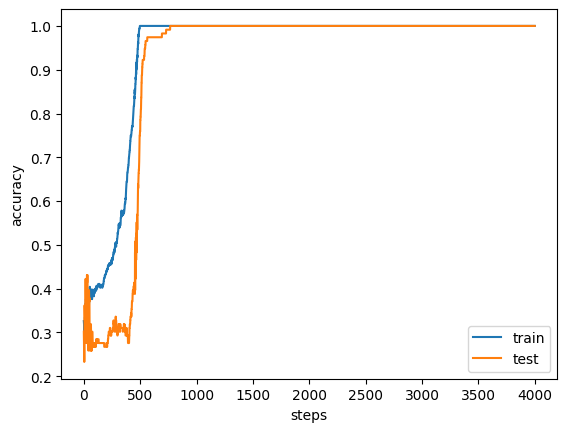

In [9]:
import matplotlib.pyplot as plt

plt.plot(train_accs)
plt.plot(test_accs)
plt.legend(['train', 'test'])
plt.xlabel('steps')
plt.ylabel('accuracy')

In [12]:
import numpy as np
from sklearn.decomposition import PCA
embd = model.embedding.cpu().detach().numpy()
X = embd
pca = PCA(n_components=5) # embd_dim =5?
pca.fit(X)
embd_t = pca.fit_transform(X)

In [13]:
pca.explained_variance_ratio_

array([5.04950880e-01, 3.43087790e-01, 1.23181252e-01, 2.87800770e-02,
       7.83468164e-33])

In [14]:
active_pca_dim = np.sum(pca.explained_variance_ratio_ > 1e-4)

In [15]:
torch.mean(model.embedding**2, dim=0)

tensor([0.0079, 0.0134, 0.0002, 0.0054, 0.0156, 0.0135, 0.0108, 0.0113, 0.0182,
        0.0220], grad_fn=<MeanBackward1>)

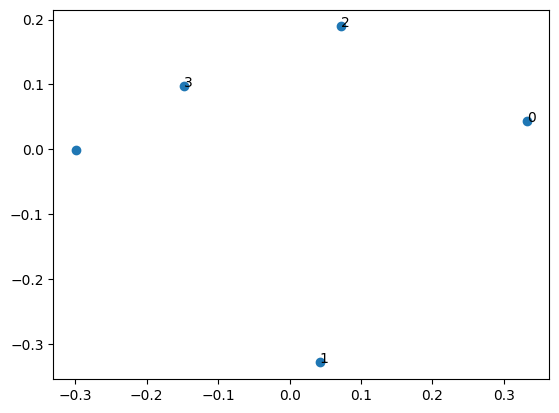

In [16]:
import copy
import matplotlib.pyplot as plt

embd = model.embedding.cpu().detach().numpy()

dim1 = 0
dim2 = 1

plt.scatter(embd_t[:,dim1], embd_t[:,dim2])


for i in range(p):
    plt.text(embd_t[i,dim1], embd_t[i,dim2], i)